# Transformace náhodné veličiny

## Příklad (Náhodná procházka na celých číslech)
Částice se pohne n-krát na číselné ose. Pohyb částice začne v bodě 0 a v každém kroku vykoná pohyb o délce jedné jednotky vzdálenosti buď doprava a nebo doleva se stejnou pravděpodobností. Předpokládejme, že jednotlivé kroky jsou na sobě stochasticky nezávislé. Nechť $Y$ označuje polohu částice po n krocích. Najděte pak pravděpodobnostní funkci $p_Y$ náhodné veličiny $Y.$

**Řešení.**
Předpokládejme, že $X$ bude označovat počet pohybů částice směrem doprava. Potom zřejmě $X\sim\textrm{Bin}(n, 1/2).$ Nyní předpokládejme, že $X=j.$ Vzhledem k závislost veličiny $Y$ na $X$, lze nyní určit hodnotu veličiny $Y.$ Pozice částice po n krocích je rovna celému číslu $j - (n - j) = 2j - n.$ Tudíž $Y = 2j - n = 2X - n.$ Vzhledem k tomu, že náhodná veličina $X$ nabývá hodnot $\{0, 1,\ldots,n\},$ tak n.v. $Y$ nabývá hodnot $\{-n, 2 - n,\ldots, n\}.$
Nyní platí:
$$
p_Y(k) = \mathbb P(Y = k) = \mathbb P(2X - n = k) = \mathbb P(X = (n+k)/2) = \binom{n}{\frac{n+k}{2}}\left(\frac{1}{2}\right)^n,
$$
kde $k\in\{-n,\ldots,n\}$ a $n+k$ je sudé celé číslo.

**Věta.(Pravděpodobnostní funkce n.v. $g(X)$).**
Nechť $X$ je diskrétní n.v. a $g: \mathbb R\to\mathbb R.$ Potom je "nosič" n.v. $Y = g(X)$ roven množině takových hodnot $y$, pro které existuje alespoň jedno $x$ obsažené v nosiči n.v. $X$ takové, že $g(x) = y$. Navíc platí:
$$
p_Y(y) = \mathbb P(g(X) = y) = \sum_{x: g(x) = y} \mathbb P(X = x),
$$
pro všechna $y$ z nosiče n.v. $g(X).$

Uvažujme n.v. $X$ a borelovskou funkci $g:\mathbb R\to\mathbb R.$ Dále pak uvažujme funkci $Y = g(X).$

**Otázka 1.**
Je funkce $Y$ náhodnou veličinou?

**Otázka 2.**
Je-li $X$ diskrétní n.v. na pravděpodobnostním prostoru $(S,\mathcal A, \mathbb P).$ Jaká je pravděpodobnostní funkce $p_Y$?

**Otázka 3.**
Je-li $X$ (absolutně) spojitá n.v., jaká je potom distribuční funkce $F_Y$ resp hustota pravděpodobnosti $f_Y$?

**Ad otázka 3.**
Předpokládejme, že známe husotu pravděpodobnosti $f_X$ n.v. $X.$ Dále předpokládejme, že funkce $g$ je rostoucí a v každém bodě má tato funkce nenulovou derivaci. Odtud pak plyne:
$$
F_Y(y) = P(Y\le y) = P(X\le g^{-1}(y)) = F_X(g^{-1}(y)).
$$

Nyní lze vyjádřit hustotu pravděpodobnosti $f_Y$ vyjádřit pomocí hustoty $f_X.$
$$
    f_Y(y) = \frac{d}{dy}F_Y(y) = \frac{d}{dy}F_X(g^{-1}(y)) = f_X(g^{-1}(y))\cdot[g^{-1}(y)]'.
$$

V případě, kdy je funkce $g$ klesající funkcí, dostaneme:
$$
    f_Y(y) = f_X(g^{-1}(y))\cdot \vert[g^{-1}(y)]'\vert. \tag{*}
$$

Poznamenejme, že vzorec (*) lze využít obecně pro jakoukoli ryze monotónní funkci $g.$

# Příklad

Najděme hustotu pravděpodobnosti n.v. $Y = e^{X},$ pokud má $X$ hustotu pravděpodobnosti $f_X$ dabou předpisem:
$$
    f_X(x) = 
    \begin{cases}
        1\ , & x\in(0,1)\\
        0\ , & x\notin (0,1).
    \end{cases}
$$

## Řešení

Zde je $g(x) = e^x$, což je rostoucí funkce. Dále 
$$
g^{-1}(y) = \ln(y).
$$
Odtud plyne, že 
$$
    [g^{-1}(y)]' = (\ln(y))' = 1/y,\ \ y\in(0,\infty).
$$

Zbývá nyní určit složenou funkci $f_X\circ g^{-1}.$

In [2]:
var("x,y")
def f_X(x):
    if 0 < x and x < 1:
        return 1
    else:
        return 0
def g(x):
    return e^x

In [3]:
rovnice = y == g(x)
g_inv(y) = solve(rovnice, x)[0].rhs()
show("g_inv(y) = \t", g_inv(y))

'g_inv(y) = \t' log(y)

In [4]:
dg_inv(y) = g_inv(y).diff()
show("dg_inv(y) = \t", dg_inv(y))

'dg_inv(y) = \t' 1/y

In [5]:
import sympy as sym
sol = sym.reduce_inequalities([g_inv(y) > 0, g_inv(y) < 1], y)
sol

(0 < y) & (1 < y) & (y < E)

Tedy platí:
$$
    g^{-1}(y)\in(0,1) \iff y\in(1,e).
$$

Nyní určeme složenou funkci $f_X\circ g^{-1}.$
$$
    (f_X\circ g^{-1})(y) = 
    \begin{cases}
        1\ ,& y\in(1,e)\\
        0\ ,& y\notin(1,e).
    \end{cases}   
$$

Odtud pak plyne:
$$
    f_Y(y) = 
    \begin{cases}
        1/y\ ,& y\in(1,e)\\
        0\ ,& y\notin(1,e).
    \end{cases}
$$

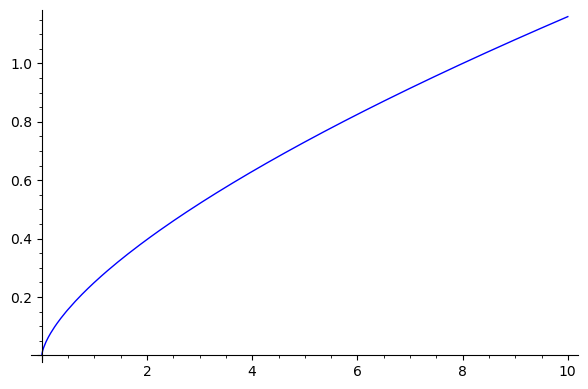

In [2]:
var("y")
plot((1/4)*y**(2/3), (y,0, 10))